## table of content

    1.functions
    2.provide and extract dataset
    3.plots and illustrations
    4.preprocessing
    5.model constructuin
      .   baseline model
      .   main model
      .   performance analysis
    6.how features impact on model
    7.final grade without G1,G2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import seaborn as sns
import tensorflow as tf 
import sklearn
import re
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam , RMSprop , SGD , Adagrad , Adamax , Adadelta
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.metrics import Accuracy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

## 1.Functions

##### Extraction dataframe

    to extract daraframe from csv file + get some statistical informations and useful reports

In [11]:
def Extract_Show_DF(path , show_head=False , show_shape=False , show_info=False , show_stats=False):
  df = pd.read_csv(path , delimiter=';')
  categorical_features=[]
  features = df.columns

  if show_shape :
    shape = df.shape
    print('\n<------------------------------------shape------------------------------------>\n')
    print(shape)

  if show_head :
    print('\n<------------------------------------head------------------------------------>\n')
    print(df.head(10))

  if show_stats :
    statistical_info = df.describe().T
    print('\n<------------------------------------statistical illustration------------------------------------>\n')
    print(statistical_info)

  if show_info :
    print('\n<------------------------details------------------------>\n')
    print(df.info())

  return df , features 

##### extract explaination 

    explaination dictionary that contains pairs of :(feature name , feature explaination)

In [12]:
def extract_dict(info):
  explanation_dict = dict()

  information_list =info.split('\n')
  for info in information_list[1:]:
    feature = re.search(r'\d+\s.\w+\s' , info)[0]
    key = feature.split(' ')[1]
    value = re.search(r'-.+[\w]+\s[(]' , info)[0][1:-1]
    explanation_dict[key] = value

  return explanation_dict

info ='''
    1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    2 sex - student's sex (binary: 'F' - female or 'M' - male)
    3 age - student's age (numeric: from 15 to 22)
    4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
    5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16 schoolsup - extra educational support (binary: yes or no)
    17 famsup - family educational support (binary: yes or no)
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19 activities - extra-curricular activities (binary: yes or no)
    20 nursery - attended nursery school (binary: yes or no)
    21 higher - wants to take higher education (binary: yes or no)
    22 internet - Internet access at home (binary: yes or no)
    23 romantic - with a romantic relationship (binary: yes or no)
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)
    30 absences - number of school absences (numeric: from 0 to 93)
    31 G1 - first period grade (numeric: from 0 to 20)
    31 G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)'''


##### missing value

    to find missin values in data set and treat them by below approaches .
        1.drop
        2.mean
       

In [13]:
def Missing_Values(df  , features , continues_features , categorical_features , nan_treatment = ["drop" , "mean"]):
  nan_count = df.isna().sum().sum()


  if nan_count > 0 :

    print(f'\033[91m There are/is {nan_count} missing values in dataset')
    print(f'process missing values by {nan_treatment} approach ...')
    if nan_treatment == 'mean':

      for feature in features :
        if feature in continues_features :
          df[feature].fillna(df[feature].mean(), inplace=True , axis=0)
        elif feature in categorical_features:   
          df[feature].fillna(df[feature].value_counts().keys()[0] , inplace=True , axis=0)

    elif nan_treatment == 'drop' :
      df.dropna(inplace=True)
      df=df.reset_index()
      df.drop(df.columns[0] , inplace=True , axis=1)


    final_nan = df.isna().sum().sum()
    print(f'\033[92m Thera are {final_nan} missing value in data set')
  else:
    print('\033[92m Thera are not missing value in data set')


  return df

##### duplicated

    to find dupliacate records as delete them .

In [14]:
def Duplicates(df):
  duplicate_count = df.duplicated().sum()
  if duplicate_count>0 :
    print(f'\033[91m There are/is {duplicate_count} dupliacte records in dataset')
    print('\033[94m')
    print(df[df.duplicated()])
    print('drop duplicates ...')
    df.drop_duplicates(inplace=True , keep='first')
    duplicate_count2 = df.duplicated().sum()

    print(f'\033[92m There is {duplicate_count2} dupliacte records in dataset')

  else :
    print(f'\033[92m There are not dupliacte records in dataset')
  return df

##### outlires

    to find outlier values in each feature separately and fix their values by one of blow methods .
    1.drop
    2.fix to limitation

    notation : i don't use this function beacause of low volume of dataset and some more reasons that i comment about them later in this test .

In [15]:
# just over continues features
def Outliers(df , features , step=3 , outlier_treatment=['drop' , 'boundries']):

  for feature in continues_features :

    Q1 = np.percentile(df[feature],25) 
    Q3 = np.percentile(df[feature],75)
    IQR = Q3 - Q1
    outlier_step = step*IQR
    upper_limiration = Q3 + outlier_step
    lower_limitarion = Q1 - outlier_step

    if outlier_treatment == 'drop' :
      df[feature] = np.where(df[feature]<lower_limitarion , np.nan , df[feature])
      df[feature] = np.where(df[feature]>upper_limiration , np.nan , df[feature])
      print(f'\033[91m finding {df[feature].isna().sum()} outlier in {feature}')
      print(f'processing by {outlier_treatment} approach...')      
      df.dropna(inplace=True)
      df=df.reset_index()
      df.drop(df.columns[0] , inplace=True , axis=1)
      print(f'\033[92m Thera are {df[feature].isna().sum().sum()} outlier in {feature}')


    elif outlier_treatment == 'boundries' :
      outlier_count =  0
      for data in df[feature] : 
        if (data>upper_limiration) or (data<lower_limitarion) : 
          outlier_count+=1
      print(f'\033[91m finding {outlier_count} outlier in {feature}')
      print(f'processing by {outlier_treatment} approach...')
      df[feature] = np.where(df[feature]<lower_limitarion , lower_limitarion , df[feature])
      df[feature] = np.where(df[feature]>upper_limiration , upper_limiration , df[feature])
      print(f'\033[91m finding {df[feature].isna().sum()} outlier in {feature}')     
    print('\033[94m ------------------------------------')
  return df


#### training process plot

    represent trend of training model based on 4 concept 
                                        ---> 'accuracy'
                                             'validation-accuracy '    
                                             ' loss '
                                             ' validation-loss '

In [16]:
def plot_training(history):
  figure , axis = plt.subplots(ncols=2 , figsize=(10,5))

  axis[0].plot(history.history['accuracy'])
  axis[0].plot(history.history['val_accuracy'])
  axis[0].legend(['acc' , 'val_acc'])
  axis[1].plot(history.history['loss'])
  axis[1].plot(history.history['val_loss'])
  axis[1].legend(['loss' , 'val_loss'])

  plt.show()

#### custom callback

    call back for stop training base on accuracy parameter to avoid more importvment (beacause of overfitting)

In [17]:
class myCollbacks(tensorflow.keras.callbacks.Callback):
  def one_epoch_end(self , epoch , logs=None):
    if (logs['accuracy']>0.9) : 
      print('\nreach the 80% accuracy on train set ... cancelling_training')
      self.model.stop_training = True

## 2.Provide path and extract dataset

    . dataset extraction from path 
    . split categorical and continuous(numerical) features
    . primary dataset is ready

    notation ! 
    some of the dataset versions that you will encounter with them later ...

    por : portugues
    por2 : portugues version2
    pro3 : portugues version3

In [18]:
path = '/content/student-por.csv'
por , features =  Extract_Show_DF(path , show_head=True , show_shape=True , show_info=True , show_stats=True)

categorical_features = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
continues_features  = features.drop(categorical_features )

por


<------------------------------------shape------------------------------------>

(649, 33)

<------------------------------------head------------------------------------>

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1     GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2     GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3     GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4     GP   F   16       U     GT3       T  ...     2       5        0  11  13  13
5     GP   M   16       U     LE3       T  ...     2       5        6  12  12  13
6     GP   M   16       U     LE3       T  ...     1       3        0  13  12  13
7     GP   F   17       U     GT3       A  ...     1       1        2  10  13  13
8     GP   M   15       U     LE3       A  ...     1       1        0  15  16  17
9     G

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [19]:
explanation_dict = extract_dict(info)
explanation_dict

{'Dalc': ' workday alcohol consumption ',
 'Fedu': " father's education (numeric: 0 - none, 1 - primary education ",
 'Fjob': " father's job ",
 'G1': ' first period grade ',
 'G2': ' second period grade ',
 'G3': ' final grade ',
 'Medu': " mother's education (numeric: 0 - none, 1 - primary education ",
 'Mjob': " mother's job ",
 'Pstatus': " parent's cohabitation status ",
 'Walc': ' weekend alcohol consumption ',
 'absences': ' number of school absences ',
 'activities': ' extra-curricular activities ',
 'address': " student's home address type ",
 'age': " student's age ",
 'failures': ' number of past class failures ',
 'famrel': ' quality of family relationships ',
 'famsize': ' family size ',
 'famsup': ' family educational support ',
 'freetime': ' free time after school ',
 'goout': ' going out with friends ',
 'guardian': " student's guardian ",
 'health': ' current health status ',
 'higher': ' wants to take higher education ',
 'internet': ' Internet access at home ',
 'nu

## 3.plots and illustration

##### bar/count plot

    bar-plot to represent how are features distributions

    for instance:
    1.
    by looking at the first and second period grade and comparing them with final period grade we can conclude : 
    student efforts improve and increase for final test because in both G1,G2 
    data has normal distribution but in final exam plot incline to the right 
    (higher scores) that completely make sense always perform better in final exams 
    rather the midterms .

    2.
    or we can see most of the students access internet .

    3.
    or most of them drink alcohol in weekends .

    and so on ...

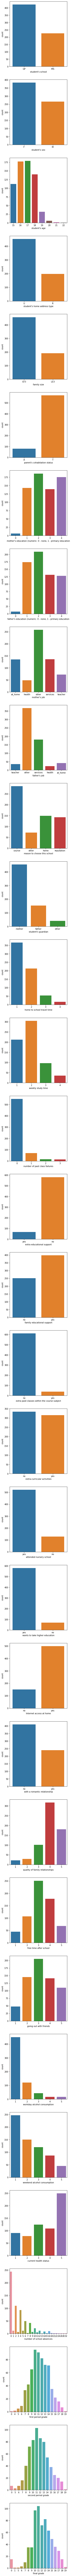

In [50]:
fig , axis = plt.subplots(nrows=len(features) ,  figsize=(5,len(features)*7))
for i in range(len(features)):
  sns.countplot(x=por[features[i]] , ax=axis[i])
  info = explanation_dict[features[i]]
  axis[i].set_xlabel(info)

plt.show()

##### distribution plot


    so here i split final grade into two parts for the sake of simplicity:
    grade>16 ---> pass
    grade<16 --->False

    and then i demonstrate each of continuous-feature distribution based on two ('fail','pass') groups .
    so in every plot you can see how students failure or pass is associated with a specific feature .


    for example by looking at the second period grade we can understand:
          just there are few students with G2 score lower than 12 , who 
          get G3 more than 16 

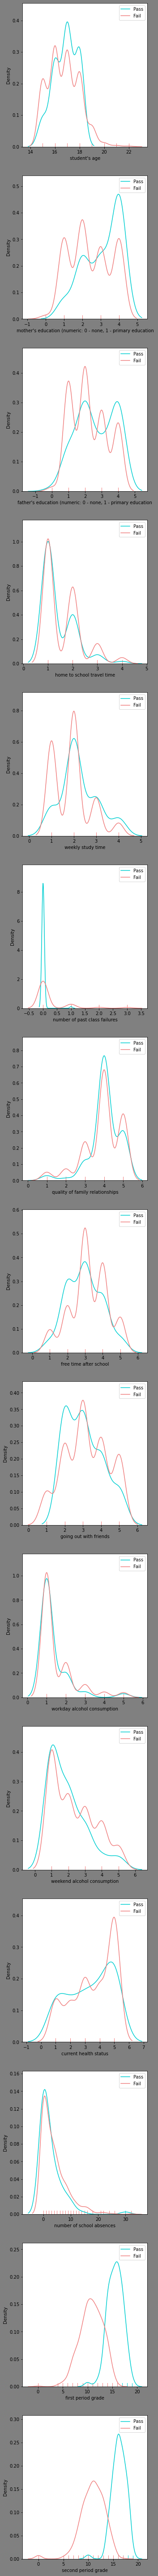

In [55]:
import warnings


warnings.filterwarnings('ignore')
fig , axis = plt.subplots(nrows=len(continues_features)-1 ,  figsize=(5,(len(continues_features)-1)*7) ,facecolor='gray')

for i,feature in enumerate(continues_features):
  if feature == 'G3':
    continue
    
  sns.distplot(por[feature][por['G3']>=16], color='darkturquoise' ,rug=True, hist=False ,ax=axis[i] , label='Pass')
  sns.distplot(por[feature][por['G3']<16] , color='lightcoral'    ,rug=True, hist=False ,ax=axis[i] , label='Fail')

  axis[i].set_xlabel(explanation_dict[feature])
  axis[i].legend(['Pass','Fail'])
plt.show()


##### box plot

    another way for investigating distribution that as also useful for checking "outliers" is boxplot
    and here by 3 diffrent shape for each feature we can compare weights of each 
    bunch for features and figure out how data is sparse over one feature .

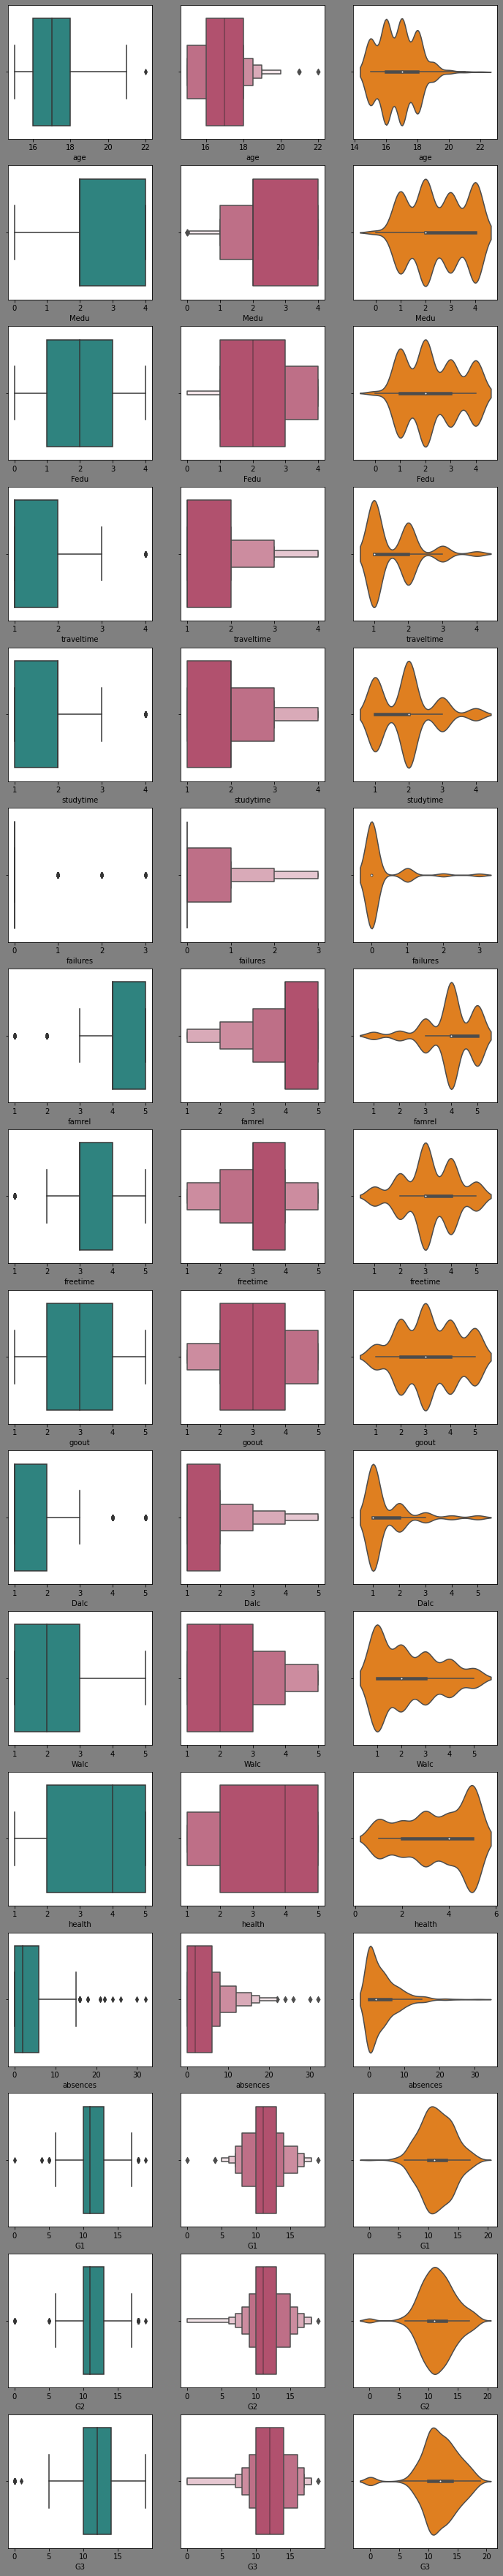

In [22]:
fig , axis = plt.subplots(nrows=len(continues_features) , ncols=3 ,  figsize=(12,len(continues_features)*4) , facecolor='gray' )

for i in range(len(continues_features)) :
  sns.boxplot(ax=axis[i][0]  , x=por[continues_features[i]] , data=por , palette = 'viridis')
  sns.boxenplot(ax=axis[i][1], x=por[continues_features[i]] , data=por , palette = 'flare')
  sns.violinplot(ax=axis[i][2] , x=por[continues_features[i]] , data=por , palette='Set1_r')

plt.show()


# Bu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', '

##### heat map

    heat map + correlation plot 
    it shows us the relation between features .

    for instance look at the relation between father job and mother job!!!
    it shows 0.65 ... and it could conclude as Family social class .

[]

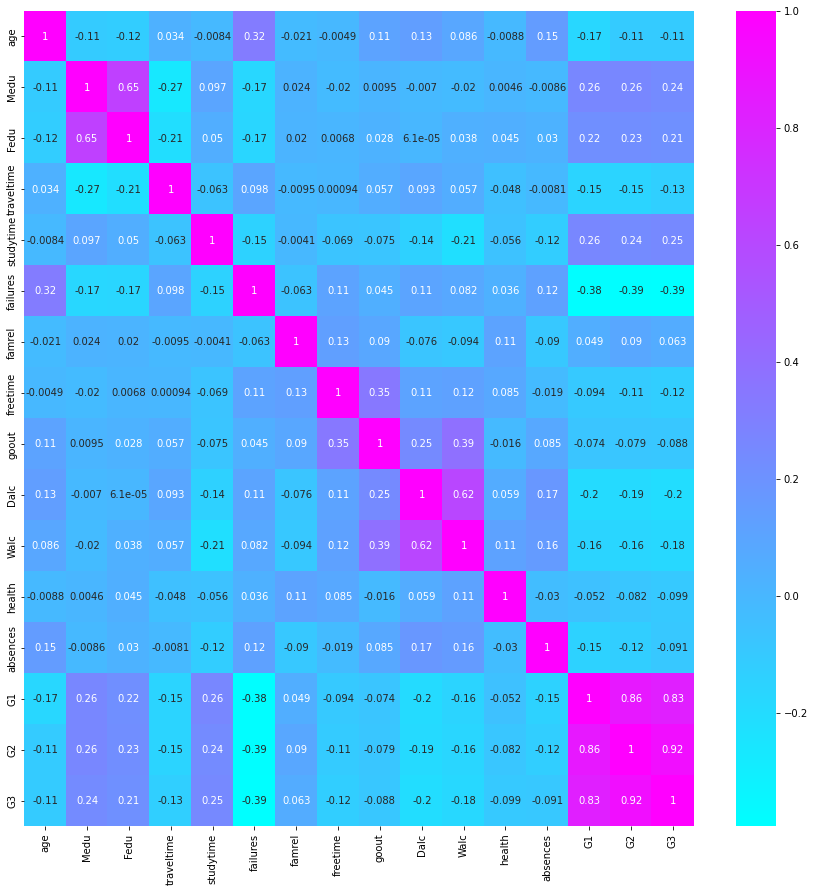

In [23]:
'''
automatically normalized
'''

fig = plt.figure(figsize=(15,15))
sns.heatmap(por.corr() , annot=True , cmap='cool')
plt.plot()


##### pair plot

        for the last plot lets check the relation of G1 , G2 , G3

[]

<Figure size 1080x1080 with 0 Axes>

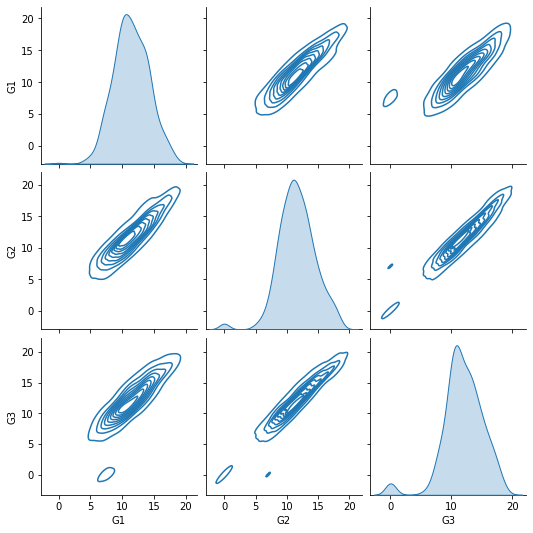

In [58]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(por[['G1' , 'G2' , 'G3']] ,kind="kde")
plt.plot()

## 4.preprocessing

##### preprocessing

1.   missing values
2.   duplicate values
3.   oulier values
4.   get dummies....(categorical features)
5.   prepare targets for classification
6.   normaliza(min max scaler)....(continuous features)
6.   encode labels
7.   train/val/test split



In [61]:
# 1 ---------------------------------
por1 = Missing_Values(por  , features , continues_features , categorical_features , nan_treatment = "drop")
# 2 ---------------------------------
por2 = Duplicates(por1)
# 3 ---------------------------------
# pro2 = Outliers


# 4 ---------------------------------
por3 = pd.get_dummies(por2 , columns=categorical_features , drop_first=True ) # drop_first=True,False




# 5 ---------------------------------

for feature in ['G3']:
  scores = []
  for score in por3[feature] :
    if score >= 16 :
      scores.append('A')
    elif 15 >= score >= 14 :
      scores.append('B')
    elif 13 >=score >= 12 :
      scores.append('C')
    elif 11 >=score >= 10 :
      scores.append('D')
    elif score<=9:
      scores.append('F')
  por3[feature] = scores


XX = por3.drop('G3' , axis=1)
YY = por3['G3']

# 6 ---------------------------------
for feature in ['absences' , 'G2' , 'G1' , 'age']:
  XX[feature]  =  (XX[feature] - XX[feature].min() )/(XX[feature].max() - XX[feature].min())

X = XX.values
Y = YY.values


# 7 ---------------------------------
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)



# 8 ---------------------------------
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , shuffle=True , random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.2 )

print('\33[93m')
print(f'shape x_train : {x_train.shape}')
print(f'shape x_val : {x_val.shape}')
print(f'shape x_test : {x_test.shape}')
print(f'shape y_train : {y_train.shape}')
print(f'shape y_val : {y_val.shape}')
print(f'shape y_test : {y_test.shape}')

# if x_train.shape[0]+x_val.shape[0]+x_test.shape[0] == X.shape[0] :print(True)
# else : print(False)

 Thera are not missing value in data set
 There are not dupliacte records in dataset

shape x_train : (415, 41)
shape x_val : (104, 41)
shape x_test : (130, 41)
shape y_train : (415,)
shape y_val : (104,)
shape y_test : (130,)


## 5.Model construction

#### baseline model

    create a simple base line model for the sake of comparsion .

Epoch 1/300
7/7 [==============================] - 1s 59ms/step - loss: 1.5700 - accuracy: 0.2554 - val_loss: 1.5986 - val_accuracy: 0.3750
Epoch 2/300
7/7 [==============================] - 0s 10ms/step - loss: 1.4565 - accuracy: 0.3566 - val_loss: 1.4791 - val_accuracy: 0.2788
Epoch 3/300
7/7 [==============================] - 0s 10ms/step - loss: 1.3763 - accuracy: 0.4120 - val_loss: 1.4494 - val_accuracy: 0.3365
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 1.3138 - accuracy: 0.4578 - val_loss: 1.4625 - val_accuracy: 0.3077
Epoch 5/300
7/7 [==============================] - 0s 10ms/step - loss: 1.2612 - accuracy: 0.4482 - val_loss: 1.3956 - val_accuracy: 0.3077
Epoch 6/300
7/7 [==============================] - 0s 10ms/step - loss: 1.1959 - accuracy: 0.4988 - val_loss: 1.4088 - val_accuracy: 0.3269
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 1.1478 - accuracy: 0.5108 - val_loss: 1.4975 - val_accuracy: 0.3173
Epoch 8/300
7/7 [====

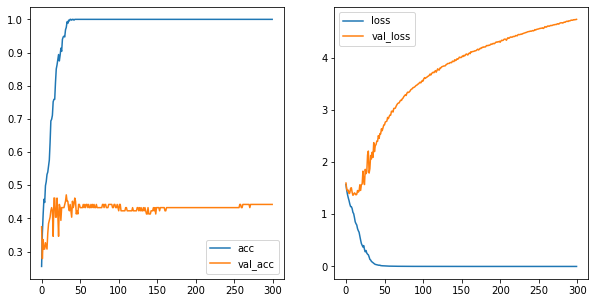

In [26]:
input_dim = X.shape[1]

inputs = tensorflow.keras.Input(input_dim)
x = tensorflow.keras.layers.Dense(64 , input_dim=input_dim , activation='relu')(inputs)
x = tensorflow.keras.layers.Dense(128  , activation='relu')(x)
x = tensorflow.keras.layers.Dense(256  , activation='relu')(x)
x = tensorflow.keras.layers.Dense(512 ,activation='relu')(x)
outputs = Dense(5 , activation='softmax')(x)
baseline_model = tf.keras.Model(inputs = [inputs] ,outputs = [outputs])


baseline_model.compile(
    optimizer = Adam()  , 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = 'accuracy'
)

history_base = baseline_model.fit(x_train , y_train ,validation_data = (x_val , y_val) ,epochs = 300 , batch_size=64)


plot_training(history_base)

##### * * * OVERFITTING * * *
    the most important and explicit point here in overfitting problem ...
    as we go through the epochs in the baseline we can see model is overfitting on the data . 
    and it can derive from some observations:
          1.accuracy is 100% but validation accuracy didn't improve than  44% .
          2.loss continuouesly reduce but validation loss explode after several epochs .
          3.on the plot it is completely clear


##### * * * AVOID FROM OVERFITTING * * *

    some methods for preventing from overfitting colud be:
    1.dropout
    2.regularization terms like l1,l2,l1_l1,...
    3.avode from complex model and keep it simple .

#### final model modification

    so with regard to the overfitting issu we define main model
    and by using these hyperparameters i reach the final model
    
    optimizer             = sgd,adam,rmsprp,adagard
    regularization        = l1,l2,l1_l2,...
    weight_initialization = he_normal , he_uniform , glorot_normal , random_normal ,...
    weight_decay          = 0.8 , 0.85 . 0.9 , 0.95
    initial_learning_rate = 1e-1,1e-2,1e-3,1e-4,1e-5,1e-6
    dropout               = 0.2,0.3,0.4,0.5
    batch_size            = 32,64,128,256
    activations           = relu , tanh , elu

In [27]:
def model_body(input_dim , kernel_initializer='he_uniform' , kernel_regularizer='l1_l2'):
  model = tensorflow.keras.Sequential([
                Dense(256  ,input_dim ,  activation='tanh' , kernel_initializer='he_uniform' , kernel_regularizer='l1_l2'),
                Dropout(0.2),
                Dense(128  , activation='tanh'),
                Dropout(0.2),
                Dense(64 , activation='tanh' ),
                Dropout(0.2),
                Dense(32 , activation='tanh' ),
                Dropout(0.2),
                Dense(5 , activation='softmax'),
                ])
  return x

In [ ]:
input_dim = X.shape[1]
input_dim

In [29]:
# callback = EarlyStopping(monitor='val_accuracy' , patience=50)
my_callback = myCollbacks()


model = tensorflow.keras.Sequential([
                Dense(units=256 ,input_dim=input_dim , activation='tanh' , kernel_initializer='he_uniform' , kernel_regularizer='l1_l2'),
                Dropout(0.2),
                Dense(128  , activation='tanh'),
                Dropout(0.2),
                Dense(64 , activation='tanh' ),
                Dropout(0.2),
                Dense(32 , activation='tanh' ),
                Dropout(0.2),
                Dense(5 , activation='softmax'),
                ])


initial_lr = 0.001 
model.compile(
    optimizer = Adam(learning_rate=initial_lr , decay=0.9*initial_lr), 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)


history = model.fit(x_train , y_train ,validation_data = (x_val , y_val) ,epochs = 1500 , batch_size=64 , callbacks=[my_callback])

Epoch 1/1500
7/7 [==============================] - 1s 39ms/step - loss: 26.7122 - accuracy: 0.2313 - val_loss: 26.0581 - val_accuracy: 0.2692
Epoch 2/1500
7/7 [==============================] - 0s 9ms/step - loss: 25.6931 - accuracy: 0.2458 - val_loss: 25.1840 - val_accuracy: 0.1250
Epoch 3/1500
7/7 [==============================] - 0s 8ms/step - loss: 24.6595 - accuracy: 0.2988 - val_loss: 24.0364 - val_accuracy: 0.3365
Epoch 4/1500
7/7 [==============================] - 0s 8ms/step - loss: 23.7968 - accuracy: 0.2602 - val_loss: 23.1516 - val_accuracy: 0.4231
Epoch 5/1500
7/7 [==============================] - 0s 8ms/step - loss: 22.8910 - accuracy: 0.3253 - val_loss: 22.3179 - val_accuracy: 0.3269
Epoch 6/1500
7/7 [==============================] - 0s 8ms/step - loss: 21.9852 - accuracy: 0.3711 - val_loss: 21.4974 - val_accuracy: 0.3654
Epoch 7/1500
7/7 [==============================] - 0s 7ms/step - loss: 21.1571 - accuracy: 0.3494 - val_loss: 20.6728 - val_accuracy: 0.3942
Epoch

##### * * * Further Details * * *

    as we can see model improve in performance is better than baseline model .

                    base-line        main-model
    accuracy          100                87          
    val-accuracy       44                70


    of course overfitting alomst was restricted but ... still there is
    and defference from 56% decrease to 17%
    ****


    in my openion there are some reason that do not let model to get better and reach higher than ~85 accuracy:

    1 . The amount of data is very small 
        by 700 records of data we usually cannot reach to high accuracy 
        in neural networks and it needs to much larger datasets .
    ----------------------------------------
    2 . it might be possible that features of or dataset do not have
        appropriate relation with the labels and output . 
        as we saw earlier the relation of previues scores (G1,G2) to the 
        final grade is more importtant rather than others . 
    ----------------------------------------
    3 . so we can modify out dataset by adding some of other grades .
        for example --- > previous  year average , match grade , class score .... 
    ----------------------------------------
    4 . often we don't use artificial neural networks on structrul data .
        apart from this NN are very powerful algoritms but they perform on
        the 2D tensors , texts , ... very better than tabular data . 
    ----------------------------------------
    5 .  You will typically see best results with deep learning with much 
         larger and more complex datasets. When working with a small dataset
         like this one, it recommended using a decision tree or random forest
         or adaboost or svm as a strong baseline. 



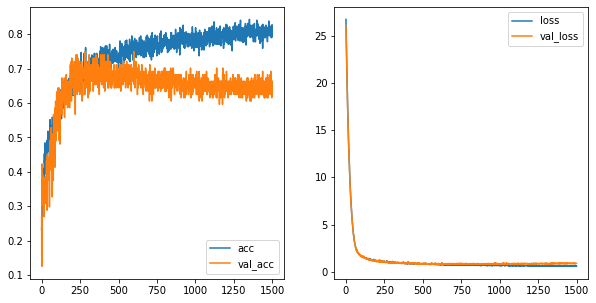

In [30]:
plot_training(history=history)

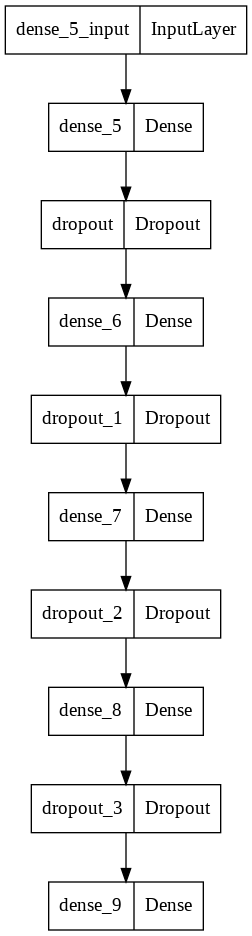

In [31]:
plot_model(model)

##### model performance on test set

In [32]:
scores = model.evaluate(x_test , y_test)
loss = scores[0]
acc = scores[1]
print('\n')
print(f'loss ---> {loss}')
print(f'accuracy ---> {acc}')

5/5 [==============================] - 0s 5ms/step - loss: 0.8222 - accuracy: 0.7077


loss ---> 0.822213351726532
accuracy ---> 0.7076923251152039


#### analysis model and performance demonstration 

In [33]:
prediction_test = model.predict(x_test)
y_pred_test = prediction_test.argmax(axis=1)

prediction_train = model.predict(x_train)
y_pred_train = prediction_train.argmax(axis=1)

##### scores / classification report

In [34]:
accuracy_score_train = accuracy_score(y_train ,y_pred_train)
accuracy_score_test  = accuracy_score(y_test , y_pred_test)
mse_error            = mean_squared_error(y_test , y_pred_test)
clf_report           = classification_report(y_test , y_pred_test)



print(f'accuracy train  --->  {accuracy_score_train}')
print(f'accuracy test  --->  {accuracy_score_test}')
print(f'mean squared error  --->  {mse_error}')
print('\n')
print('other details :')
print(f'classification report : \n{clf_report}')

accuracy train  --->  0.8746987951807229
accuracy test  --->  0.7076923076923077
mean squared error  --->  0.2923076923076923


other details :
classification report : 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.59      0.59      0.59        22
           2       0.69      0.69      0.69        29
           3       0.82      0.67      0.74        42
           4       0.55      0.73      0.63        15

    accuracy                           0.71       130
   macro avg       0.69      0.72      0.70       130
weighted avg       0.72      0.71      0.71       130



##### confusion matrix

    as we can see in confusion matrix , model performance on A , C , D scores is better than B , F
    and the model are facing with more mistakes to detecting B,F

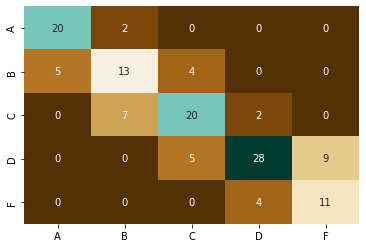

In [35]:
conf_matrix = confusion_matrix(y_test , y_pred_test )
confusion_df = pd.DataFrame(conf_matrix,
                            columns=['A' , 'B' , 'C' , 'D' , 'F'], 
                            index = ['A' , 'B' , 'C' , 'D' , 'F'])

sns.heatmap(confusion_df , 
            annot=True ,
            cbar=False ,
            cmap='BrBG')
plt.show()

##### prediction vs. test data one by one

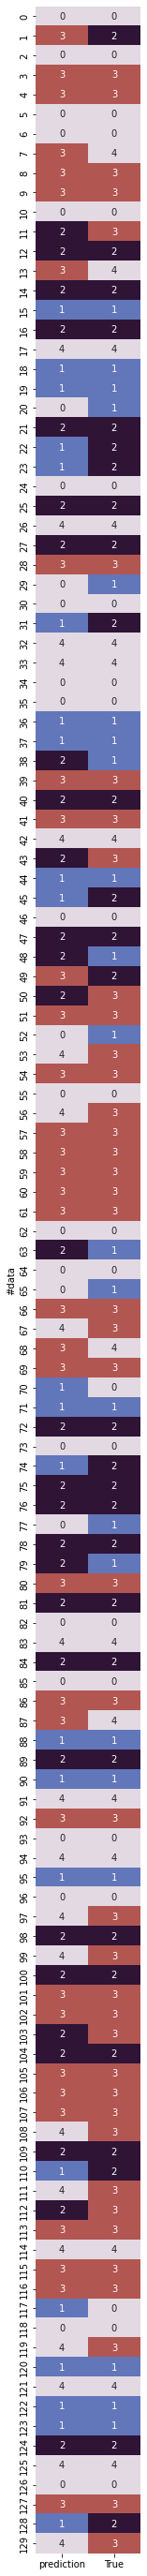

In [36]:
prediction_df = pd.DataFrame(y_pred_test.reshape(-1,1) , columns=['prediction'])
t_test_df = pd.DataFrame(y_test.reshape(-1,1) , columns=['True'])
comparison_df = pd.concat([prediction_df , t_test_df] ,axis=1 )

plt.figure(figsize=(2,50))
sns.heatmap(comparison_df,
            cmap='twilight' , 
            annot=True ,
            annot_kws={'size' : 10},
            cbar=False)
plt.ylabel('#data')
plt.show()

## how features impact on the model

##### shap

    usig shap package to get importance of features

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.KernelExplainer(model.predict,x_train)

In [39]:
shap_values = explainer.shap_values(x_test,nsamples=100)

  0%|          | 0/130 [00:00<?, ?it/s]

##### Coefficient of each feature

    as i mentioned above the most effect and weight on the final grade come from previous grades (G2,G1) .
    and in the below dataframe we can see the defference of Coefficient between G1,G2 and other features is very very large .  

In [62]:
cols = por3.columns.drop('G3')
shap_sum = np.abs(shap_values).mean(axis=0)
probs = pd.DataFrame(shap_sum , columns=cols)

det = dict()
for col in cols:
  det[col] = sum(probs[col])

sorted_tuples = sorted(det.items(), key=lambda item: item[1] , reverse=True)
sorted_dict = {k: v for k, v in sorted_tuples}

feature_effects = pd.DataFrame(sorted_dict.values() , index=sorted_dict.keys() , columns=['Coefficient'])
feature_effects


,Coefficient
G2,23.654445
G1,5.364561
Fjob_other,1.036789
school_MS,0.979500
age,0.862860
freetime,0.857278
Mjob_teacher,0.839640
studytime,0.742493
sex_M,0.620289
goout,0.548752


##### coefficient illustration

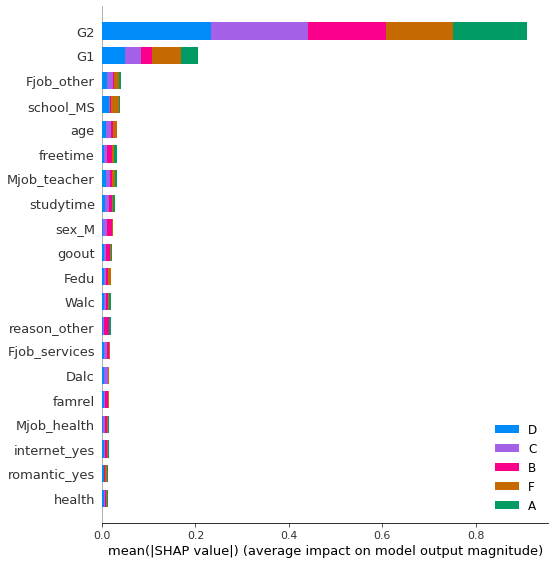

In [41]:
shap.summary_plot(shap_values,  feature_names=por3.columns.drop('G3'), plot_type='bar' , class_names=['A' , 'B' , 'C' , 'D' , 'F'])

## Final grade without G1 and G2

    in the final step we implement or last model on the new dataset that contains all of the features except that G1,G2

    and as we can see in the output model accuracy get stuck under the 50% and doesn't perform well .

In [64]:
# 1 ---------------------------------
por1 = Missing_Values(por  , features , continues_features , categorical_features , nan_treatment = "drop")
# 2 ---------------------------------
por2 = Duplicates(por1)
# 3 ---------------------------------
# pro2 = Outliers

# 4 ---------------------------------
por3 = pd.get_dummies(por2 , columns=categorical_features , drop_first=True ) # drop_first=True,False

# 5 ---------------------------------

for feature in ['G3']:
  scores = []
  for score in por3[feature] :
    if score >= 16 :
      scores.append('A')
    elif 15 >= score >= 14 :
      scores.append('B')
    elif 13 >=score >= 12 :
      scores.append('C')
    elif 11 >=score >= 10 :
      scores.append('D')
    elif score<=9:
      scores.append('F')
  por3[feature] = scores

XX = por3.drop(['G3','G2','G1'] , axis=1)
YY = por3['G3']

for feature in ['absences']:
  XX[feature]  =  (XX[feature] - XX[feature].min() )/(XX[feature].max() - XX[feature].min())

X = XX.values
Y = YY.values

# 6 ---------------------------------
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# 7 ---------------------------------
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.2 , shuffle=True , random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.2 )

print(f'shape x_train : {x_train.shape}')
print(f'shape x_val : {x_val.shape}')
print(f'shape x_test : {x_test.shape}')
print(f'shape y_train : {y_train.shape}')
print(f'shape y_val : {y_val.shape}')
print(f'shape y_test : {y_test.shape}')

if x_train.shape[0]+x_val.shape[0]+x_test.shape[0] == X.shape[0] :print(True)
else : print(False)




# callback = EarlyStopping(monitor='val_accuracy' , patience=50)


 Thera are not missing value in data set
 There are not dupliacte records in dataset
shape x_train : (415, 39)
shape x_val : (104, 39)
shape x_test : (130, 39)
shape y_train : (415,)
shape y_val : (104,)
shape y_test : (130,)
True


Epoch 1/500
7/7 [==============================] - 1s 36ms/step - loss: 26.3582 - accuracy: 0.2506 - val_loss: 25.5625 - val_accuracy: 0.3173
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 25.3817 - accuracy: 0.2554 - val_loss: 24.6631 - val_accuracy: 0.3269
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 24.4577 - accuracy: 0.2747 - val_loss: 23.7449 - val_accuracy: 0.3462
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 23.5535 - accuracy: 0.2482 - val_loss: 22.8746 - val_accuracy: 0.3942
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 22.7318 - accuracy: 0.2699 - val_loss: 22.0387 - val_accuracy: 0.3846
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 21.8864 - accuracy: 0.2988 - val_loss: 21.2142 - val_accuracy: 0.4038
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 21.0468 - accuracy: 0.2771 - val_loss: 20.4371 - val_accuracy: 0.3750
Epoch 8/500

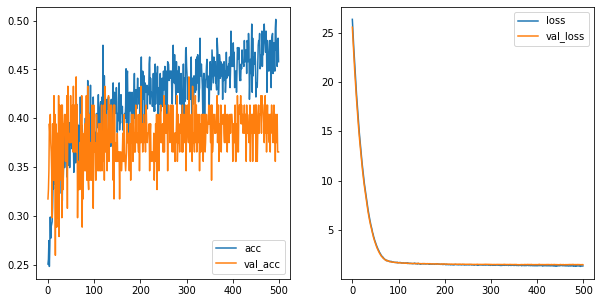

5/5 [==============================] - 0s 4ms/step - loss: 1.5791 - accuracy: 0.3308


loss ---> 1.5791020393371582
accuracy ---> 0.33076924085617065


In [65]:
my_callback = myCollbacks()

input_dim_new = XX.shape[1]
model_non_grade = tensorflow.keras.Sequential([
                Dense(units=256 ,input_dim=input_dim_new , activation='tanh' , kernel_initializer='he_uniform' , kernel_regularizer='l1_l2'),
                Dropout(0.2),
                Dense(128  , activation='tanh'),
                Dropout(0.2),
                Dense(64 , activation='tanh' ),
                Dropout(0.2),
                Dense(32 , activation='tanh' ),
                Dropout(0.2),
                Dense(5 , activation='softmax'),
                ])


initial_lr = 0.001 
model_non_grade.compile(
    optimizer = Adam(learning_rate=initial_lr , decay=0.9*initial_lr), 
    loss = 'sparse_categorical_crossentropy' , 
    metrics = ['accuracy']
)


history = model_non_grade.fit(x_train , y_train ,validation_data = (x_val , y_val) ,epochs = 500 , batch_size=64 , callbacks=[my_callback])
plot_training(history)


scores = model_non_grade.evaluate(x_test , y_test)
loss = scores[0]
acc = scores[1]
print('\n')
print(f'loss ---> {loss}')
print(f'accuracy ---> {acc}')

## conclusion 


based in my observations and what i was faced with that in this test
the correlation between features don't make sense  and as you see in the last test , by removing G1,G2 features that had high effects on the model , model performance decrease dramatically .(from 71% to 33%)

so i think by modifying dataset and adding more related features that can impact performance , we could extract higher accuracy from model rather than non-related feature like romantic relationship or ... .